 **INSTALLING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE # imblearn library can be installed using pip install imblearn
from imblearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

 **LOADING THE DATASET ONTO COLAB**

In [ ]:
dt=pd.read_csv('/content/test[1].csv')
dt

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


**BY PRINTING THESE TWO PIECES OF INFORMATION, THE CODE PROVIDES AN OVERVIEW OF THE STRUCTURE OF THE DT DATAFRAME, INCLUDING ITS SHAPE AND COLUMN NAMES.**

In [ ]:
from numpy.core.arrayprint import printoptions
print(dt.shape)
print(dt.columns)

(25976, 25)
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


**CHECKING FOR NULL VALULES**

In [ ]:
print(dt.isnull())

       Unnamed: 0     id  Gender  Customer Type    Age  Type of Travel  Class  \
0           False  False   False          False  False           False  False   
1           False  False   False          False  False           False  False   
2           False  False   False          False  False           False  False   
3           False  False   False          False  False           False  False   
4           False  False   False          False  False           False  False   
...           ...    ...     ...            ...    ...             ...    ...   
25971       False  False   False          False  False           False  False   
25972       False  False   False          False  False           False  False   
25973       False  False   False          False  False           False  False   
25974       False  False   False          False  False           False  False   
25975       False  False   False          False  False           False  False   

       Flight Distance  Inf

**DROPPING THE 'UNNAMED: 0' AND 'ID' COLUMNS FROM THE PANDAS DATAFRAME**

In [ ]:
dt = dt.drop(['Unnamed: 0','id'], axis=1)

**PRINTS THE NUMBER OF MISSING VALUES IN EACH COLUMN OF THE PANDAS DATAFRAME**

In [ ]:
print(dt.isnull().sum()) 

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64


**CONVERTING CATEGORICAL FEATURES INTO NUMERICAL FEATURES**

In [ ]:

def converter(column):
    if column == 'Loyal Customer':
        return 1
    else:
        return 0

In [ ]:
dt['Customer Type'] = dt['Customer Type'].apply(converter)

In [ ]:
dt['Gender'] = dt['Gender'].map({'Female':1, 'Male':0})

In [ ]:
dt['Type of Travel'] = dt['Type of Travel'].map({'Personal Travel':1, 'Business travel':0})

In [ ]:
dt['Class'] = dt['Class'].map({'Business':1, 'Eco Plus':0, 'Eco':2})

In [ ]:

def converter(column):
    if column == 'satisfied':
        return 1
    else:
        return 0

In [ ]:
dt['satisfaction'] = dt['satisfaction'].apply(converter)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int64  
 1   Customer Type                      25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  int64  
 4   Class                              25976 non-null  int64  
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

**METRIC 1 INDICATION OF SATISFIED AND DISSATISFIED CUSTOMERS**

In [ ]:
satisfaction_counts = dt['satisfaction'].value_counts()
print(satisfaction_counts)

0    14573
1    11403
Name: satisfaction, dtype: int64


In [ ]:
satisfied_count = dt['satisfaction'].sum()
unsatisfied_count = len(dt) - satisfied_count

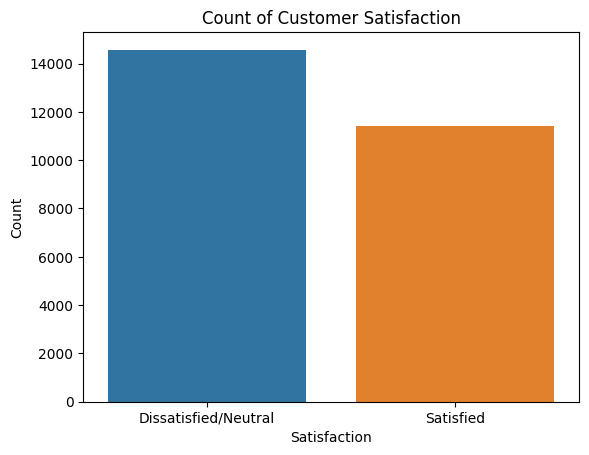

In [ ]:
sns.countplot(x='satisfaction', data=dt)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.xticks([0,1], ['Dissatisfied/Neutral', 'Satisfied'])
plt.title('Count of Customer Satisfaction')
plt.show()

**METRIC 2 PERCENTAGE OF CUSTOMERS ARRIVING ON TIME**

In [ ]:
on_time = dt[dt['Arrival Delay in Minutes'] <= 0]

In [ ]:
on_time_percentage = len(on_time) / len(dt) * 100

In [ ]:
print(f"On-time arrival percentage: {on_time_percentage:.2f}%")

On-time arrival percentage: 56.18%


**METRIC 3 DISTRIBUTION OF LOYAL AND DISLOYAL CUSTOMERS**

In [ ]:
loyal_customers = dt['Customer Type'].value_counts()
labels = ['Disloyal Customers', 'Loyal Customers']
colors = ['#FF5733', '#33FF57']
fig = go.Figure(data=[go.Pie(labels=labels, values=loyal_customers, hole=.5, marker=dict(colors=colors))])
fig.update_layout(title='Percentage of Loyal and Disloyal Customers')
fig.show()

**METRIC 4: NO OF COMPLAINTS AGAINST THE SEVERITY OF EACH COMPLAINT, WITH 0 BEING LEAST AND 5 BEING MOST**

In [ ]:
complaint_counts = dt.groupby('Departure/Arrival time convenient')['Departure/Arrival time convenient'].count()

In [ ]:
fig = go.Figure([go.Bar(x=complaint_counts.index, y=complaint_counts)])
fig.update_layout(title='Customer Complaints', xaxis_title='Complaint Category', yaxis_title='Number of Complaints')
fig.show()

**CORRELATION MATRIX**

<Axes: >

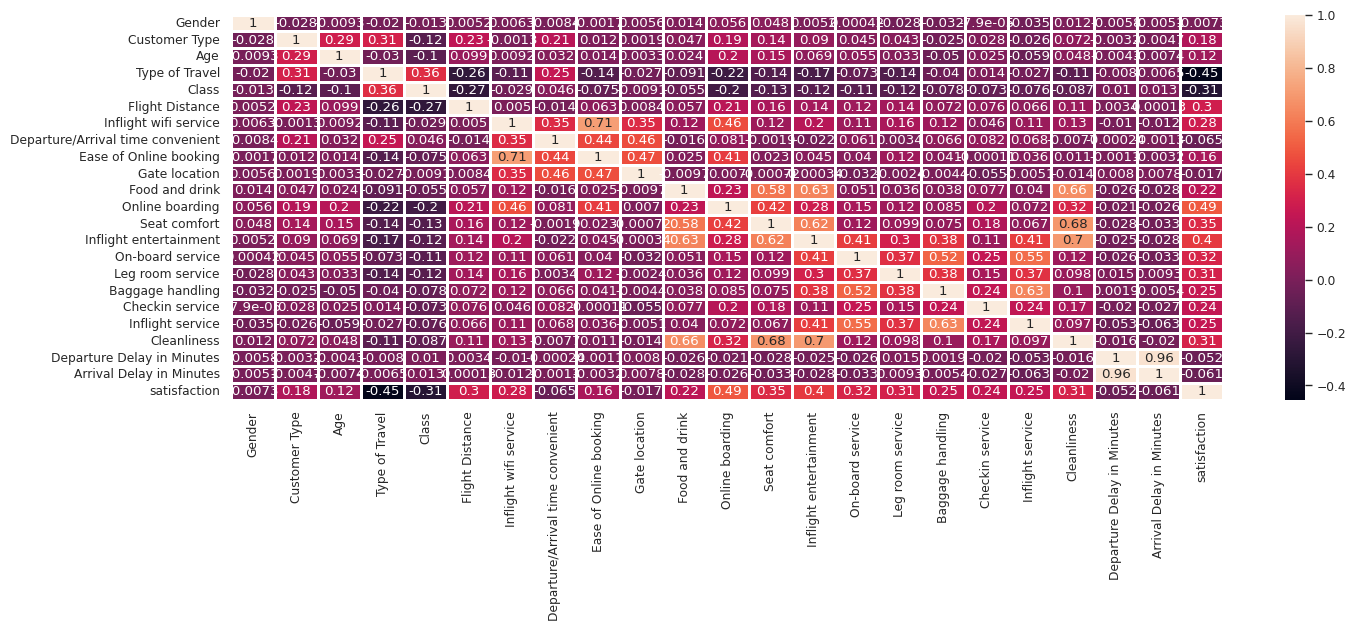

In [ ]:
import seaborn as sns
# %matplotlib inline
plt.figure(figsize = (16,5))
graph = sns.heatmap(dt.corr(),xticklabels=True, yticklabels=True, annot=True,linewidths=2)
graph

**FEATURE SELECTION**

In [ ]:
x = dt.drop(columns=['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Leg room service',
       'Baggage handling', 'Checkin service' , 'Departure Delay in Minutes', 'Arrival Delay in Minutes'])
y = dt['satisfaction']

In [ ]:
x

,Online boarding,Seat comfort,Inflight entertainment,On-board service,Inflight service,Cleanliness
0,4,3,5,5,5,5
1,4,5,4,4,4,5
2,2,2,2,4,2,2
3,4,4,1,1,1,4
4,1,2,2,2,2,4
...,...,...,...,...,...,...
25971,3,4,4,3,5,4
25972,4,4,4,4,5,4
25973,1,2,2,4,4,2
25974,4,4,4,3,5,4


**LOGISTIC REGRESSION**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 101)

model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8037982805081484

In [ ]:
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[3663  684]
 [ 845 2601]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      4347
           1       0.79      0.75      0.77      3446

    accuracy                           0.80      7793
   macro avg       0.80      0.80      0.80      7793
weighted avg       0.80      0.80      0.80      7793



In [ ]:
#Aplying stochastic gradient descent
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(x)

#F1 as scoring parameter
model = Pipeline([
        ('balancing', SMOTE(random_state = 101)),
        ('classification', SGDClassifier(loss = 'log', penalty = 'elasticnet', random_state = 1))
    ])
#grid_param = {'classification__eta0': [.001,.01,.1,1,10,100], 'classification__max_iter' : [100,500,1000], 'classification__alpha': [.001,0.01,.1,1,10,100], 'classification__l1_ratio': [0,0.3,0.5,0.7,1]}
grid_param = {'classification__eta0': [.001], 'classification__max_iter' : [100], 'classification__alpha': [.001], 'classification__l1_ratio': [0]}

gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='f1', cv=5)


**STOCHASTIC GRADIENT DESCENT**

In [ ]:
"""
In the above GridSearchCV(), scoring parameter should be set as follows:
scoring = 'accuracy' when you want to maximize prediction accuracy
scoring = 'recall' when you want to minimize false negatives
scoring = 'precision' when you want to minimize false positives
scoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)
"""

gd_sr.fit(X_scaled, y)

best_parameters = gd_sr.best_params_
print("Best parameters: ", best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("Best result: ", best_result)

Best parameters:  {'classification__alpha': 0.001, 'classification__eta0': 0.001, 'classification__l1_ratio': 0, 'classification__max_iter': 100}
Best result:  0.7670607804457449


In [ ]:
gd_sr.fit(x_train, y_train)
y_pred = gd_sr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[3248 1099]
 [ 586 2860]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.79      4347
           1       0.72      0.83      0.77      3446

    accuracy                           0.78      7793
   macro avg       0.78      0.79      0.78      7793
weighted avg       0.79      0.78      0.78      7793



In [ ]:
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(x_train,y_train)
y_pred = DTC.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3771  576]
 [ 617 2829]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4347
           1       0.83      0.82      0.83      3446

    accuracy                           0.85      7793
   macro avg       0.85      0.84      0.84      7793
weighted avg       0.85      0.85      0.85      7793



**DECISION TREE**

In [ ]:
# Tuning the decision tree classifier's max_depth and implementing cross-validation using Grid Search
model = Pipeline([
        ('balancing', SMOTE(random_state = 101)),
        ('classification', tree.DecisionTreeClassifier(criterion = 'entropy'))
    ])
grid_param = {'classification__max_depth': [2,3,4,5,10,15,20,25,30,35]}



gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='recall', cv=5)
"""
In the above GridSearchCV(), scoring parameter should be set as follows:
scoring = 'accuracy' when you want to maximize prediction accuracy
scoring = 'recall' when you want to minimize false negatives
scoring = 'precision' when you want to minimize false positives
scoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)
"""

"\nIn the above GridSearchCV(), scoring parameter should be set as follows:\nscoring = 'accuracy' when you want to maximize prediction accuracy\nscoring = 'recall' when you want to minimize false negatives\nscoring = 'precision' when you want to minimize false positives\nscoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)\n"

In [ ]:
gd_sr.fit(X_scaled, y)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

{'classification__max_depth': 2}
0.8579323473084288


In [ ]:
import math
math.sqrt(len(y_test))

88.2779700718135

**K NEAREST NEIGHBOUR**

In [ ]:
#As we can see 197 is an odd number and Neighbours should be chosen odd.
#define Model: init K-NN
classifier=KNeighborsClassifier(n_neighbors=197,p=2,metric='euclidean')

#Fit the model

classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=197)

In [ ]:
#Predict the test result

y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
#evaluate the model

cm=confusion_matrix(y_test,y_pred)
cm

array([[3852,  495],
       [ 821, 2625]])

In [ ]:
print(f1_score(y_test,y_pred))

0.7995735607675907


In [ ]:
print(accuracy_score(y_test,y_pred))

0.8311305017323238
